# Programming Drill 3.3.1 Modify your program from Programming Drill 3.2.1 so that you allow the entries to be complex numbers as opposed to fractions.

Yanofsky, Noson S.. Quantum Computing for Computer Scientists (p. 97). Cambridge University Press. Kindle Edition. 

We practically do not need to do anything for that. As we are using numpy. Let's copy the functions from 3.2.1

In [1]:
import numpy as np
from numpy.linalg import matrix_power

In [2]:
def change_state(M, init_state, time_click, doubly_stochastic=True):
    if doubly_stochastic:
        col_sums = np.sum(M, axis=0)
        if np.max(col_sums) > 1:
            print("The matrix does not comply to our need, because of columns")
            return None
        row_sums = np.sum(M, axis=1)
        if np.max(row_sums) > 1:
            print("The matrix does not comply to our need, because of rows")
            return None
    final_matrix = matrix_power(M, time_click)
    return np.matmul(final_matrix, init_state.transpose()).transpose()

In [17]:
def construct_transition_matrix(slits_and_targets):
    tm = []
    slit_probs = slits_and_targets[0]
    target_probs = slits_and_targets[1]
    
    dimension = len(slit_probs) + 1
    
    for i, x in enumerate(target_probs):
        if i % 2 == 0:
            dimension += len(x)
        else:
            dimension += 1
    
    trm = np.zeros((dimension, dimension), dtype=np.complex128)
    target_row_start = 0
    
    for i, slit in enumerate(slit_probs):
        trm[i+1][0] = slit
        target_row_start += 1
    
    target_row_start += 1
    target_col_start = 1
    target_dig_row_start = target_row_start
    
    for i, tp in enumerate(target_probs):
        if i % 2 == 0:
            for t in tp:
                trm[target_row_start][target_col_start] = t
                target_row_start += 1
        else:
            for j, t in enumerate(tp):
                trm[target_row_start][target_col_start+j] = t
            target_col_start += 1
            target_row_start += 1
    
    m = target_dig_row_start
    for i in range(m, dimension):
        trm[target_dig_row_start][target_dig_row_start] = 1
        target_dig_row_start += 1
    
    return trm

In [18]:
import math
one_by_root_two = 1.0/math.sqrt(2)
root_six = math.sqrt(6)

In [19]:
P = construct_transition_matrix([[one_by_root_two, one_by_root_two],
                               [[(-1+1j)/root_six, (-1-1j)/root_six],
                                [(1-1j)/root_six, (-1+1j)/root_six],
                                [(-1-1j)/root_six, (1-1j)/root_six]]])

In [53]:
P

array([[ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.70710678+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.70710678+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        , -0.40824829+0.40824829j,
         0.        +0.j        ,  1.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        , -0.40824829-0.40824829j,
         0

In [54]:
P_sq = matrix_power(P, 2).transpose()

In [55]:
P_sq.shape

(8, 8)

In [56]:
P_sq[5, 0]

0j

In [57]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [58]:
def draw_graph_from_np_array(array):
    G = nx.from_numpy_matrix(array, create_using=nx.MultiDiGraph())
    G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
    G.graph['graph'] = {'scale': '3'}
    pos = nx.circular_layout(G)
    nx.draw_circular(G)
    labels = {i : i for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=15)
    plt.show()

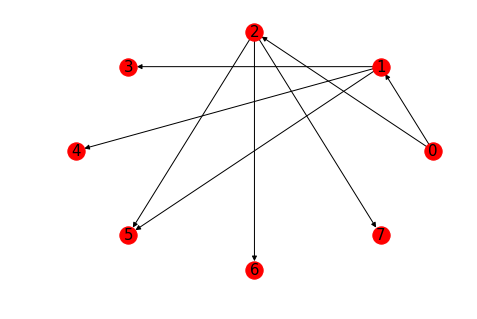

In [59]:
draw_graph_from_np_array(P.transpose())